# ResNet(Deep Residual Learning for Image Recognition)을 이해하기 위한 GoingDeeper 2 노드

## Residual = 잔차, 나머지 라는 뜻


## ResNet에 대해 이해를 하기 위해서 해당 [블로그](https://bskyvision.com/644?category=635506)의 글을 참고했다.

### [CNN의 알고리즘]
- LeNet-5
- AlexNet
- VGG-F, VGG-M, VGG-S
- VGG-16, VGG-19
- GoogLeNet(inception v1)
- ResNet
- SENet

### [특성]
- ResNet은 152개 층을 가지고 있다.
- 기존의 방식으로는 망을 무조건 깊게 한다고 성능이 좋아지는것을 아니었다.
- ResNet의 핵심 기능 : Residual Block
- ResNet은 F(x) + x를 최소화하는 것을 목적
- F(x)가 0이 되면 출력과 입력이 모두 x로 같아지게 됨
- F(x) = H(x) - x 이다. 
- F(x)를 최소로 해준다는 것은 H(x) - x를 최소로 해주는 것과 동일한 의미
- H(x) - x를 잔차(residual)라고 한다.
- 잔차를 최소로 해주는 것이므로 ResNet 이라는 이름이 붙여지게 됨.

## ResNet의 구조

1. ResNet은 기본적으로 VGG-19의 구조를 뼈대로 함.
2. 1)에 컨볼루션 층들을 추가해서 깊게 만든 후에
3. shortcut들을 추가하면 ResNet 완!성! 
4. 34층의 ResNet과 여기에 shortcut들을 제외한 버전인 plain 네트워크의 구조는 아래 이미지와 같다.



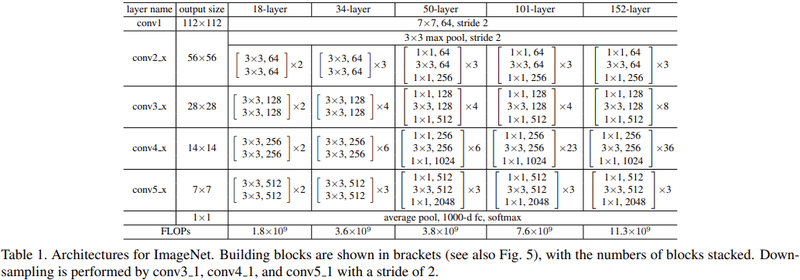

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# ResNet - 34

In [3]:
res_34_input_layer = keras.layers.Input(shape=(224,224,3))
x = res_34_input_layer

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)
shortcut = x

#--------------------stage 2 : 3x3, conv, 64-------------------------------------------------------------------
x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 : 3x3, conv, 128------------------------------------------------------------------
shortcut = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 : 3x3, conv, 256------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 : 3x3, conv, 512------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

2021-12-21 14:12:54.560211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-21 14:12:54.567075: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [4]:
res_34 = keras.Model(inputs=res_34_input_layer, outputs=x)
res_34.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

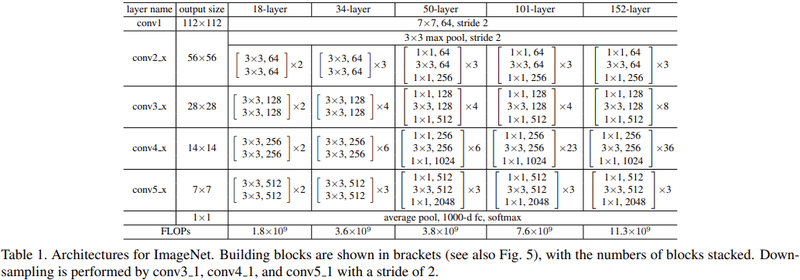

# ResNet - 50

In [5]:
res_50_input_layer = keras.layers.Input(shape=(224,224,3))
x = res_50_input_layer

x = keras.layers.ZeroPadding2D((3,3))(x)

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='valid')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.ZeroPadding2D((1,1))(x)

x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2)(x)
shortcut = x

#--------------------stage 2 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(1,1))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(1024, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(2048, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(2048, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, shortcut])
shortcut = x
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

res_50 = keras.Model(inputs=res_50_input_layer, outputs=x)
res_50.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 112, 112, 64) 256         conv2d_36[0][0]                  
____________________________________________________________________________________________

# Plain - 34
short_cut 하지않은채 그대로 쌓은 layer

In [6]:
plain_34_input_layer = keras.layers.Input(shape=(224,224,3))
x = plain_34_input_layer

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)

#--------------------stage 2 : 3x3, conv, 64-------------------------------------------------------------------
x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 : 3x3, conv, 128------------------------------------------------------------------
shortcut = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 : 3x3, conv, 256------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(1,1))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 : 3x3, conv, 512------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

In [7]:
plain_34 = keras.Model(inputs=plain_34_input_layer, outputs=x)
plain_34.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_83 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_76 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_84 (Batc (None, 56, 56, 64)        256 

# Plain - 50

In [8]:
plain_50_input_layer = keras.layers.Input(shape=(224,224,3))
x = plain_50_input_layer

x = keras.layers.ZeroPadding2D((3,3))(x)

#--------------------stage 1 : 7x7, conv, 64 / 3x3, conv, 64---------------------------------------------------
x = keras.layers.Conv2D(64, (7,7), strides=(2,2), padding='valid')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.ZeroPadding2D((1,1))(x)

x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2)(x)

#--------------------stage 2 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(256, (1,1), padding='same', strides=(1,1))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(64, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 3 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(128, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(128, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 4 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(1024, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(256, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(256, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(1024, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#--------------------stage 5 -----------------------------------------------------------------------------------
shortcut = keras.layers.Conv2D(2048, (1,1), padding='same', strides=(2,2))(shortcut)
shortcut = keras.layers.BatchNormalization()(shortcut)

x = keras.layers.Conv2D(512, (1,1), padding='same', strides=(2,2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.Conv2D(2048, (1,1), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

#-------------------------------------------------------------------------------------------------
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2, activation='softmax')(x)

plain_50 = keras.Model(inputs=plain_50_input_layer, outputs=x)
plain_50.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_119 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
activation_109 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0   

# Plain vs ResNet

### 데이터 준비

In [9]:
(ds_train, ds_test), ds_info = tfds.load('cats_vs_dogs',
                                         split=['train[:80%]', 'train[80%:]'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

2021-12-21 14:13:03.595193: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]WARNING:absl:1738 images were corrupted and were skipped


Dataset cats_vs_dogs downloaded and prepared to /Users/unis/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [10]:
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [11]:
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


In [12]:
# 정규화
def normalize_and_resize_img(image, label):
    image = tf.image.resize(image, [224,224])
    return tf.cast(image, tf.float32) / 255., label

In [13]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(normalize_and_resize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [14]:
ds_info.features['label'].num_classes

2

In [15]:
ds_info.features["label"].names

['cat', 'dog']

2021-12-21 14:15:40.238306: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-21 14:15:40.269335: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


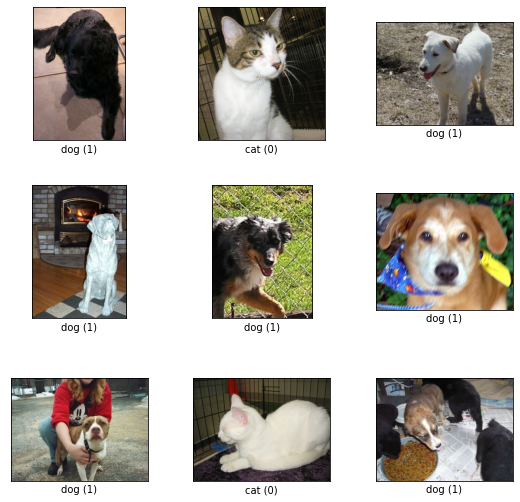

In [16]:
fig = tfds.show_examples(ds_train, ds_info)

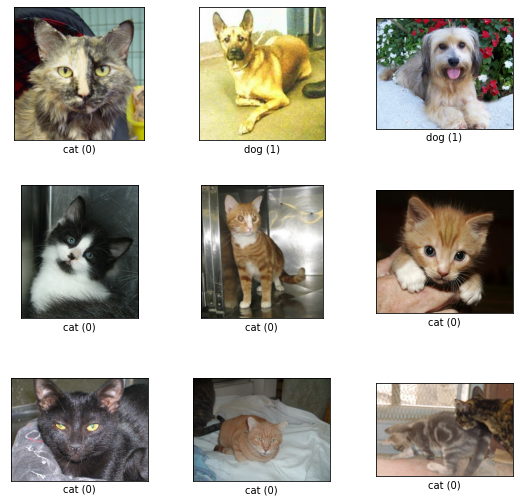

In [17]:
fig = tfds.show_examples(ds_test, ds_info)

### Plain-34 vs ResNet-34

In [18]:
BATCH_SIZE = 32
EPOCH = 15

In [19]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

In [20]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [21]:
res_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_res_34 = res_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

/Users/unis/miniforge3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15


2021-12-21 14:16:00.719303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-21 14:16:12.228423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 140 of 200
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
2021-12-21 14:16:17.568785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


 18/581 [..............................] - ETA: 41:03 - loss: 0.7130 - accuracy: 0.5521

 34/581 [>.............................] - ETA: 38:08 - loss: 0.6929 - accuracy: 0.5607

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


107/581 [====>.........................] - ETA: 31:08 - loss: 0.6645 - accuracy: 0.6043

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


312/581 [===============>..............] - ETA: 16:19 - loss: 0.6458 - accuracy: 0.6251

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 15:23 - loss: 0.6445 - accuracy: 0.6262

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 14:38 - loss: 0.6452 - accuracy: 0.6261

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


364/581 [=================>............] - ETA: 12:52 - loss: 0.6450 - accuracy: 0.6255

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


370/581 [==================>...........] - ETA: 12:28 - loss: 0.6452 - accuracy: 0.6253

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


577/581 [============================>.] - ETA: 13s - loss: 0.6313 - accuracy: 0.6378

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.6380

2021-12-21 14:49:19.454714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 2127s 3s/step - loss: 0.6311 - accuracy: 0.6380 - val_loss: 1.7107 - val_accuracy: 0.5165
Epoch 2/15
 26/581 [>.............................] - ETA: 30:23 - loss: 0.5806 - accuracy: 0.7007

 36/581 [>.............................] - ETA: 27:40 - loss: 0.5862 - accuracy: 0.6884

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


110/581 [====>.........................] - ETA: 18:46 - loss: 0.5862 - accuracy: 0.6866

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


318/581 [===============>..............] - ETA: 10:06 - loss: 0.5707 - accuracy: 0.7000

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


329/581 [===============>..............] - ETA: 9:39 - loss: 0.5701 - accuracy: 0.6998

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 9:03 - loss: 0.5697 - accuracy: 0.7006

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


370/581 [==================>...........] - ETA: 7:54 - loss: 0.5706 - accuracy: 0.6990

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


376/581 [==================>...........] - ETA: 7:40 - loss: 0.5703 - accuracy: 0.6993

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


439/581 [=====================>........] - ETA: 5:17 - loss: 0.5644 - accuracy: 0.7036

In [ ]:
plain_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_34 = plain_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

NameError: name 'plain_34' is not defined

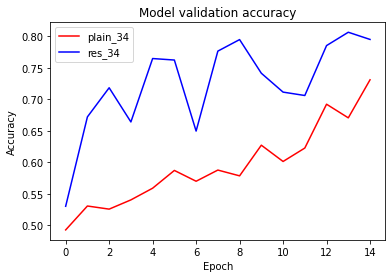

In [ ]:
plt.plot(history_plain_34.history['val_accuracy'], 'r')
plt.plot(history_res_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_34', 'res_34'], loc='upper left')
plt.show()

### Plain-50 vs ResNet-50

In [ ]:
res_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_res_50 = res_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

Epoch 1/15
581/581 [==============================] - 523s 793ms/step - loss: 0.6630 - accuracy: 0.6001 - val_loss: 0.7080 - val_accuracy: 0.5827
Epoch 2/15
581/581 [==============================] - 395s 680ms/step - loss: 0.6268 - accuracy: 0.6505 - val_loss: 0.7396 - val_accuracy: 0.5994
Epoch 3/15
581/581 [==============================] - 397s 683ms/step - loss: 0.6159 - accuracy: 0.6576 - val_loss: 0.7568 - val_accuracy: 0.5784
Epoch 4/15
581/581 [==============================] - 397s 684ms/step - loss: 0.6034 - accuracy: 0.6733 - val_loss: 0.7476 - val_accuracy: 0.6110
Epoch 5/15
581/581 [==============================] - 397s 683ms/step - loss: 0.5742 - accuracy: 0.6983 - val_loss: 0.5923 - val_accuracy: 0.6847
Epoch 6/15
581/581 [==============================] - 398s 685ms/step - loss: 0.5643 - accuracy: 0.7086 - val_loss: 0.6124 - val_accuracy: 0.6695
Epoch 7/15
581/581 [==============================] - 395s 680ms/step - loss: 0.5456 - accuracy: 0.7270 - val_loss: 0.9299 -

In [ ]:
plain_50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_plain_50 = plain_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1
)

Epoch 1/15
581/581 [==============================] - 349s 575ms/step - loss: 0.7021 - accuracy: 0.5535 - val_loss: 0.9381 - val_accuracy: 0.5455
Epoch 2/15
581/581 [==============================] - 330s 568ms/step - loss: 0.6943 - accuracy: 0.5557 - val_loss: 2.1625 - val_accuracy: 0.5087
Epoch 3/15
581/581 [==============================] - 331s 569ms/step - loss: 0.7001 - accuracy: 0.5284 - val_loss: 0.7073 - val_accuracy: 0.5399
Epoch 4/15
581/581 [==============================] - 330s 568ms/step - loss: 0.6955 - accuracy: 0.5415 - val_loss: 1.5576 - val_accuracy: 0.5143
Epoch 5/15
581/581 [==============================] - 331s 569ms/step - loss: 0.6928 - accuracy: 0.5411 - val_loss: 0.8229 - val_accuracy: 0.5280
Epoch 6/15
581/581 [==============================] - 331s 570ms/step - loss: 0.6889 - accuracy: 0.5513 - val_loss: 0.7154 - val_accuracy: 0.5608
Epoch 7/15
581/581 [==============================] - 331s 570ms/step - loss: 0.6946 - accuracy: 0.5447 - val_loss: 0.9106 -

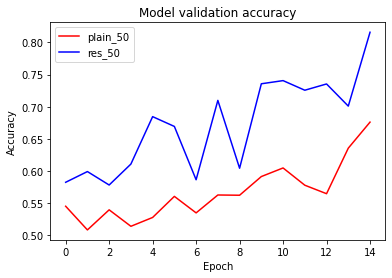

In [ ]:
plt.plot(history_plain_50.history['val_accuracy'], 'r')
plt.plot(history_res_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain_50', 'res_50'], loc='upper left')
plt.show()

# 1번째 회고.2021.12.20

- ResNet이 층층이 많이 겹쳐서 (마치 크레이프 처럼) 학습이 오래 걸린다...
- 여기서 코드를 함수로 모듈화 하고 싶은데 어디부터 건드려야할지 고민이 된다.
  - 사람들에게(경렬님, 태윤님, 유진님, 준형님 등등) 함께 코드 리뷰를 하면서 배운 내용이 도움이 되는것 같다.
- 사실 여기까지는 일명 '무지성'으로 한층 한층을 직접 쌓았다고 한다면 앞으로는 미리 생각해서 만들 때 부터 모듈화 기획해서 만드는걸 목표로 잡아야겠다.
- 20일 LMS 스터디를 통해 경렬님이 ResNet의 구조를 하나씩 뜯어서 설명해줘서 이해는 된 거같지만 나 스스로 다시 뜯어봐야할 것 같다.

